# ML4NLP1

## Starting Point for Exercise 1, part I

This notebook is supposed to serve as a starting point and/or inspiration when starting exercise 1, part I.

One of the goals of this exercise is to get you acquainted with sklearn and related libraries like pandas and numpy. You will probably need to consult the documentation of those libraries:
- sklearn: [Documentation](https://scikit-learn.org/stable/user_guide.html)
- Pandas: [Documentation](https://pandas.pydata.org/docs/#)
- NumPy: [Documentation](https://numpy.org/doc/)
- SHAP: [Documentation](https://shap.readthedocs.io/en/latest/index.html)

## Task Description

Follow the instructions in this notebook to:

1. Explore the data and create training/test splits for your experiments

2. Build a LogisticRegression classifier and design some relevant features to apply it to your data

3. Conduct hyperparameter tuning to find the optimal hyperparameters for your model

4. Explore your model's predictions and conduct an error analysis to see where the model fails

5. Conduct an interpretability analysis, investigating the model's most important features.

6. Conduct an ablation study using a subset of languages


Throughout the notebook, there are questions that you should address in your report. These are marked with 🗒❓.

☝ Note, these questions are intended to provide you with an opportunity to reflect on what it is that you are doing and the kind of challenges you might face along the way.




In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

### Loading the datasets

In [2]:
# Download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /content/x_train.txt
100% 64.1M/64.1M [00:00<00:00, 121MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /content/x_test.txt
100% 65.2M/65.2M [00:02<00:00, 29.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /content/y_train.txt
100% 480k/480k [00:00<00:00, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /content/y_test.txt
100% 480k/480k [00:00<00:00, 162MB/s]


In [3]:
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

In [4]:
# Combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# Write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t', encoding='utf-8')
# Comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})
# Inspect the first 5 items in the train split
train_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha


In [5]:
# Get list of all labels
labels = train_df['label'].unique().tolist()
print(labels)

['est', 'swe', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam', 'vie', 'pan', 'szl', 'ckb', 'fur', 'wuu', 'arz', 'ton', 'eus', 'map-bms', 'glk', 'nld', 'bod', 'jpn', 'arg', 'srd', 'ext', 'sin', 'kur', 'che', 'tuk', 'pag', 'tur', 'als', 'koi', 'lat', 'urd', 'tat', 'bxr', 'ind', 'kir', 'zh-yue', 'dan', 'por', 'fra', 'ori', 'nob', 'jbo', 'kok', 'amh', 'khm', 'hbs', 'slv', 'bos', 'tet', 'zho', 'kor', 'sah', 'rup', 'ast', 'wol', 'bul', 'gla', 'msa', 'crh', 'lug', 'sun', 'bre', 'mon', 'nep', 'ibo', 'cdo', 'asm', 'grn', 'hin', 'mar', 'lin', 'ile', 'lmo', 'mya', 'ilo', 'csb', 'tyv', 'gle', 'nan', 'jam', 'scn', 'be-tarask', 'diq', 'cor', 'fao', 'mlg', 'yid', 'sme', 'spa', 'kbd', 'udm', 'isl', 'ksh', 'san', 'aze', 'nap', 'dsb', 'pam', 'cym', 'srp', 'stq', 'tel', 'swa', 'vls', 'mzn', 'bel', 'lad', 'ina', 'ava', 'lao', 'min', 'ita', 'nds-nl', 'oss', 'kab', 'pus', 'fin', 'snd', 'kaa', 'fas', 'cbk', 'cat', 'nci', 'mhr', 'roa-tara', 'frp', 'ron', 'new', 'bar', 'ltg'


### 1.1 Exploring the training data

📝❓Take a look at a couple of texts from different languages and answer the following questions:

1. Do you notice anything that might be challenging for the classification?
2. How is the data distributed? (i.e., how many instances per label are there in the training and test set? Is it a balanced dataset?)
3. Do you think the train/test split is appropriate (i.e., is the test data representative of the training data)? If not, please rearrange the data in a more appropriate way.


In [6]:
# TODO: Inspect the training data
# count of labels in train data
train_label_count = train_df['label'].value_counts()
test_label_count = test_df['label'].value_counts()

# to display all rows
pd.set_option('display.max_rows',None)

# display
print('count of labels in train set')
print(train_label_count)
print('count of labels in test set')
print(test_label_count)

pd.reset_option('display.max_rows')

count of labels in train set
label
ltz          500
est          500
swe          500
nav          500
mwl          500
pol          500
rue          500
vec          500
nds          500
aym          500
tgk          500
hat          500
pcd          500
tam          500
vie          500
pan          500
szl          500
ckb          500
fur          500
wuu          500
arz          500
ton          500
eus          500
map-bms      500
glk          500
nld          500
bod          500
jpn          500
arg          500
srd          500
ext          500
sin          500
kur          500
che          500
tuk          500
pag          500
tur          500
als          500
koi          500
lat          500
urd          500
tat          500
bxr          500
ind          500
kir          500
zh-yue       500
dan          500
por          500
fra          500
ori          500
nob          500
jbo          500
kok          500
amh          500
khm          500
hbs          500
slv          

### 1.2 Data preparation

Get a subset of the train/test data that includes 20 languages.
Include English, German, Dutch, Danish, Swedish, Norwegian, and Japanese, plus 13 additional languages of your choice based on the items in the list of labels.

In [7]:
from sklearn.model_selection import train_test_split

# TODO: Create your train/test subsets of languages
language_filter = ['eng','deu','nld','dan','swe','nob','jpn', #basics
                   'fra', 'spa', 'rus', 'por', 'ita', 'kor', 'ara', 'zho', 'hin', 'tam', 'tha', 'vie', 'fin' #additionals
                   ]
# Filter x and y based on the language filter
filtered_x = [text for text,label in zip(x_train + x_test,y_train + y_test) if label in language_filter]
filtered_y = [label for label in y_train + y_test if label in language_filter]

# Split the train/test data into 8:2
x_train,x_test,y_train,y_test = train_test_split(filtered_x,filtered_y,test_size = 0.2,random_state=42)

#display
print(x_train[:5])
print(y_train[:5])

['銀行券は帝国国庫及びドイツ帝国銀行(Reichsbank)から発行され、帝国のいくつかの構成国の銀行からも発行された。帝国国庫発行の帝国紙幣(Reichskassenschein)は5、10、20、50マルクが発行された一方、ドイツ帝国銀行券(Reichsbanknote)は20、50、100、1000マルクが発行された。1914年以降に発行されたこれらの銀行券はパピエルマルクと呼ばれる。', 'في عام 2007، كرئيس أساقفة و كاردينال بوينس آيرس، قدم بيرجوليو النسخة النهائية من البيان المشترك الصادر عن أساقفة أمريكا اللاتينية المسمى "وثيقة أباريسيدا" بعد إقراره من قبل البابا بندكت السادس عشر. نصت الوثيقة على ضرورة الامتثال و قبول تعاليم الكنيسة ضد "جرائم نكراء" مثل الإجهاض والقتل الرحيم: "نأمل أن المشرعين ورؤساء الحكومات، والعاملين في مجال الصحة، سيدركون كرامة الحياة الإنسانية وأهمية العائلة في شعوبنا، و سيدافعون عن حمايتها من جرائم نكراء مثل الإجهاض والقتل الرحيم، وهذه هي مسؤوليتهم. ونحن نلزم أنفسنا "تماسك إفخارستي"، بما معناه، يجب أن نكون واعين بأن الناس لا يستطيعون الحصول على القربان المقدس وفي الوقت نفسه هم يعملون ضد الوصايا، ولا سيما عندما يوافقون على الإجهاض والقتل الرحيم، وغيرها من الجرائم الخطيرة ضد الحياة والعائلة، وهو ينطبق بشكل خاص على مسؤولية المشرعين والحكام، والعاملين

In [8]:
# TODO: With the following code, we wanted to ENCODE the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit(y_train)
y_train, y_test = label_encoder.transform(y_train), label_encoder.transform(y_test)
print(label_encoder.classes_)
print(y_train)
print(y_test)

['ara' 'dan' 'deu' 'eng' 'fin' 'fra' 'hin' 'ita' 'jpn' 'kor' 'nld' 'nob'
 'por' 'rus' 'spa' 'swe' 'tam' 'tha' 'vie' 'zho']
[ 8  0  4 ... 19 18  1]
[ 7 15 12 ...  1  1  0]


### 2.1 Build a LogisticRegression classifier

To start with, we're going to build a very simple LogisticRegression classifier.
Use a `Pipeline` to chain togther a `CountVectorizer` and a `LogisticRegression` estimator. Then perform a 5-fold cross validation and report the scores of this model as a baseline.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# TODO: Define a very basic pipeline using a CountVectorizer and a LogisticRegression classifier
pipeline = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('classifier',LogisticRegression(max_iter=1000))
])


In [10]:
# TODO: Run a cross validation to estimate the model's expected performance
scores = cross_val_score(pipeline,x_train,y_train,cv=5)
print('Cross-validation scores',scores)
print('Average cross-validation scorees',scores.mean())

Cross-validation scores [0.946875  0.9440625 0.949375  0.950625  0.9496875]
Average cross-validation scorees 0.9481249999999999



### 2.2 Feature Engineering

So far, we've only considered the basic `CountVectorizer` at the word level to encode our input texts for our model.

Your task is to apply some text preprocessing and engineer some more informative features.

To do this, think about what other features might be relevant for determining the language of an input text.

Define a custom set of feature extractors and implement the necessary preprocessing steps to extract these features from strings.

Then initialise a processing pipeline that converts your input data into features that the model can take as input.

☝ Note, this step can be as involved as your heart desires, there is only one minimal requirement: you must use something more than the base `CountVectorizer`. We recommend that you take a look at the [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) and [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html#transformermixin) classes from `sk-learn`, as these can be helpful for defining custom transformers.


In [11]:
# TODO: Data cleaning/Feature engineering steps
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

# Text length as a feature
class TextLengthExtractor(BaseEstimator,TransformerMixin):
  def fit(self,x,y=None):
    return self

  def transform(self, x):
    return [[len(text)] for text in x]

pipeline = Pipeline([
    ('features',FeatureUnion([
        ('vectorizer',CountVectorizer()),
        ('text_length',TextLengthExtractor())
    ])),
    ('scaler',StandardScaler(with_mean=False)),
    ('classifier',LogisticRegression())
])

scores = cross_val_score(pipeline,x_train,y_train,cv=5)
print('Cross-validation scores',scores)
print('Average cross-validation scorees',scores.mean())


Cross-validation scores [0.9459375 0.94625   0.9425    0.9546875 0.94625  ]
Average cross-validation scorees 0.947125


---

### 3.1 Grid Search

Use sklearn's GridSearchCV and experiment with the following hyperparameters:
1. Penalty (Regularization)
2. Solver
3. Experiment with parameters of the Vectorizer (optional, but highly advised)

☝ Note, don't overdo it at the beginning, since runtime might go up fast!

Make sure you read through the [docs](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) to get an understanding of what these parameters do.


In [12]:
# TODO: GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__penalty' : ['l1','l2'],
    'classifier__solver' : ['lbfgs','liblinear'],
    # 'classifier__C' : [0.1,1,10],

    # 'features__vectorizer__ngram_range' : [(1,1),(1,2)]
    'features__vectorizer__max_features' : [5000,10000]
}

grid_search = GridSearchCV(pipeline,param_grid,cv=5,verbose=2)

grid_search.fit(x_train,y_train)

print('Best parameters: ', grid_search.best_params_)
print('Best cross validation scores: ', grid_search.best_score_)



Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END classifier__penalty=l1, classifier__solver=lbfgs, features__vectorizer__max_features=5000; total time=   1.1s
[CV] END classifier__penalty=l1, classifier__solver=lbfgs, features__vectorizer__max_features=5000; total time=   1.1s
[CV] END classifier__penalty=l1, classifier__solver=lbfgs, features__vectorizer__max_features=5000; total time=   1.2s
[CV] END classifier__penalty=l1, classifier__solver=lbfgs, features__vectorizer__max_features=5000; total time=   1.1s
[CV] END classifier__penalty=l1, classifier__solver=lbfgs, features__vectorizer__max_features=5000; total time=   1.2s
[CV] END classifier__penalty=l1, classifier__solver=lbfgs, features__vectorizer__max_features=10000; total time=   1.1s
[CV] END classifier__penalty=l1, classifier__solver=lbfgs, features__vectorizer__max_features=10000; total time=   1.1s
[CV] END classifier__penalty=l1, classifier__solver=lbfgs, features__vectorizer__max_features=10000; tota

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyth

Best parameters:  {'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'features__vectorizer__max_features': 10000}
Best cross validation scores:  0.9399375000000001


### 3.2 Best Model Selection

After conducting our Grid Search, we should be able to identify our best model by inspecting the using the Grid Search result attribute `cv_results_`. (Hint: `cv_results_` returns a dictionay, so convert it to a Pandas Dataframe for easy inspection.)

📝❓ What were the hyperparameter combinations for your best-performing model on the test set.

📝❓ What is the advantage of grid search cross-validation?


In [13]:
# TODO: Select the best model based on the GridSearch results
# Convert cv_results_ to DataFrame
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Sort the DataFrame by mean test score
cv_results_df = cv_results_df.sort_values(by='mean_test_score', ascending=False)

# Display the top-performing models
print(cv_results_df[['mean_test_score', 'params']].head())

   mean_test_score                                             params
7         0.939938  {'classifier__penalty': 'l2', 'classifier__sol...
6         0.933250  {'classifier__penalty': 'l2', 'classifier__sol...
3         0.929938  {'classifier__penalty': 'l1', 'classifier__sol...
2         0.927875  {'classifier__penalty': 'l1', 'classifier__sol...
4         0.924125  {'classifier__penalty': 'l2', 'classifier__sol...


## 3.3 Model Evaluation

Once you have identified your best model, use it to predict the languages of texts in the test split.

📝❓ According to standard metrics (e.g. Accurracy, Precision, Recall and F1), how well does your model perform on the heldout test set?


In [14]:
from sklearn.metrics import classification_report
# TODO: Evaluate the model by inspecting the predictions on the heldout test set
y_pred = grid_search.best_estimator_.predict(x_test)

# detailed report on standard metrics
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       204
           1       0.92      0.96      0.94       195
           2       0.97      0.97      0.97       197
           3       0.98      0.95      0.96       209
           4       0.97      1.00      0.98       194
           5       0.98      0.97      0.97       193
           6       0.97      0.99      0.98       194
           7       0.99      0.98      0.99       201
           8       0.37      0.70      0.48       112
           9       0.97      1.00      0.99       186
          10       0.97      1.00      0.98       204
          11       0.93      0.92      0.93       182
          12       0.98      0.99      0.98       181
          13       0.98      0.99      0.98       185
          14       0.97      0.98      0.98       204
          15       0.99      0.99      0.99       198
          16       0.99      1.00      0.99       202
          17       0.98    

---

### 4.1 Error Analysis

Inspect your model's predictions using a confusion matrix and provide a summary of what you find in your report.

📝❓ Where does your model do well and where does it fail?

📝❓ What are some possible reasons for why it fails in these cases?

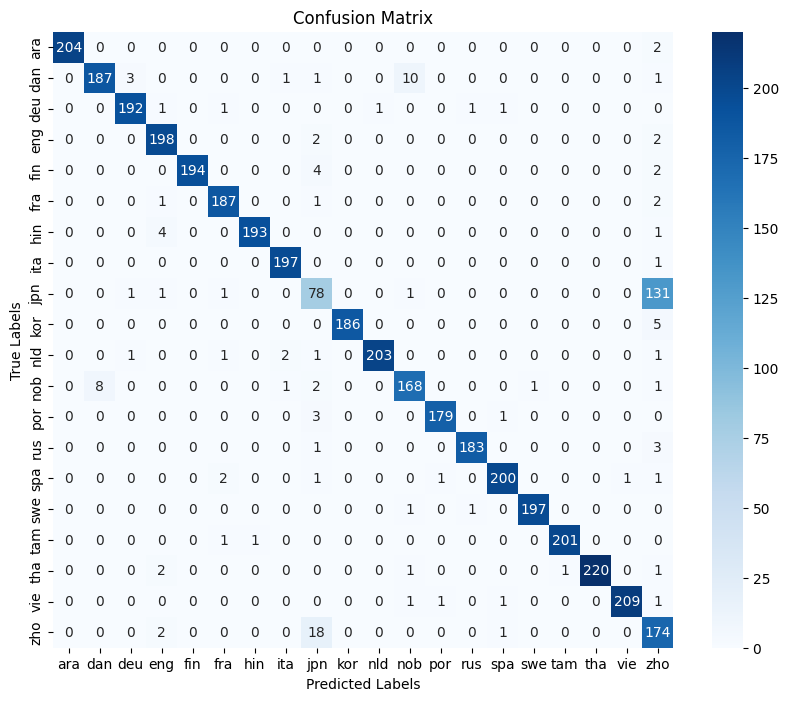

In [15]:
# TODO: Inspect the model's predcitions on the different classes
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

---

### 5.1 Interpretability Analysis

Now that you have your best model, it's time to dive deep into understanding how the model makes predictions.

It is important that we can explain and visualise our models to improve task performance. Explainable models help characterise model fairness, transparency, and outcomes.

Let's try to understand what our best-performing logistic regression classification model has learned.

Inspect the 20 most important features for the languages English, Swedish, Norwegian, and Japanese. Please make sure that the features are named and human-interpretable, not things like "Feat_1". (Hint: if you have used custom feature extractors in your pipeline, you may need to adapt these to make sure that the feature names are maintained.)

📝❓ What is more important, extra features or the outputs of the vectorizer? Please discuss.

We recommend using the [SHAP library](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html) as discussed in the tutorial. We've provided an example notebook for working with SHAP for multi-class classification in the course GitHub repo.

☝ Note, if you prefer to use another interpretability tool, we will accept answers from any explanation library/method as long as the explanations for the model weights are provided in a structured/clear way.



In [16]:
# To use shap, we first need to install it into the current environment
!pip install --upgrade shap

import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 35.3 MB/s eta 0:00:00


In [17]:
# TODO: Inspect most important features according to the model using SHAP
best_pipeline = Pipeline([
    ('features',FeatureUnion([
        ('vectorizer',CountVectorizer(max_features=10000)),
        ('text_length',TextLengthExtractor())
    ])),
    ('scaler',StandardScaler(with_mean=False)),
    ('classifier',LogisticRegression(penalty='l2',solver='liblinear'))
])

best_pipeline.fit(x_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('vectorizer',
                                                 CountVectorizer(max_features=10000)),
                                                ('text_length',
                                                 TextLengthExtractor())])),
                ('scaler', StandardScaler(with_mean=False)),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [18]:
# Combine the feature names
vectorizer = best_pipeline.named_steps['features'].transformer_list[0][1]
vectorizer_feature_names = vectorizer.get_feature_names_out()

custom_feature_names = ['text_length']

feature_names = np.append(vectorizer_feature_names, custom_feature_names)

# Create a function that applies the pipeline transformations
def best_pipeline_transform(X):
    return best_pipeline[:-1].transform(X).toarray()

# List of target languages
target_languages = ['eng', 'swe', 'nob', 'jpn']

x_train_transformed = best_pipeline_transform(x_train)
x_test_transformed = best_pipeline_transform(x_test)

# Check the feature length of the transformed data. At first, I didn't limit the feature length, then the session crashed. Lol
num_features = x_test_transformed.shape[1]
print(f"Number of features: {num_features}")


Number of features: 10001


['ara' 'dan' 'deu' 'eng' 'fin' 'fra' 'hin' 'ita' 'jpn' 'kor' 'nld' 'nob'
 'por' 'rus' 'spa' 'swe' 'tam' 'tha' 'vie' 'zho']
(4000, 10001, 20)


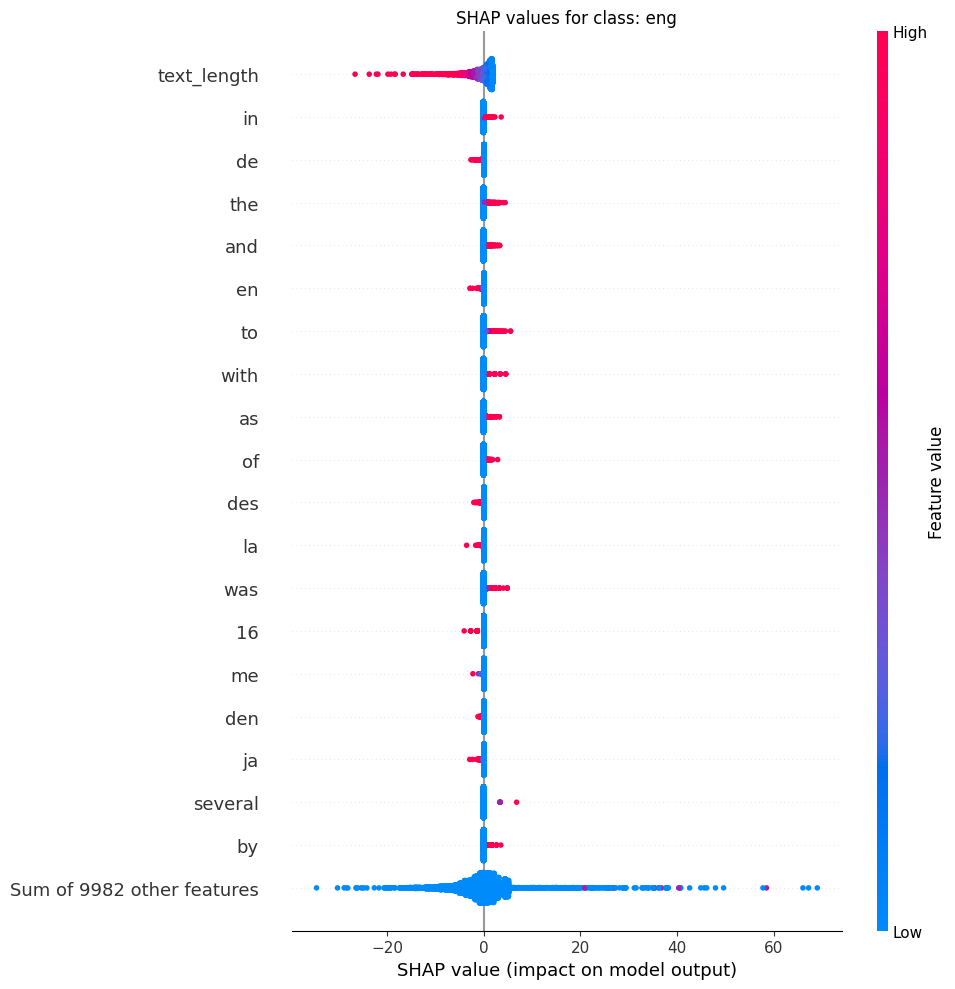

<ipython-input-19-6b1cfa3f238b>:20: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  plt.tight_layout()
<ipython-input-19-6b1cfa3f238b>:20: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


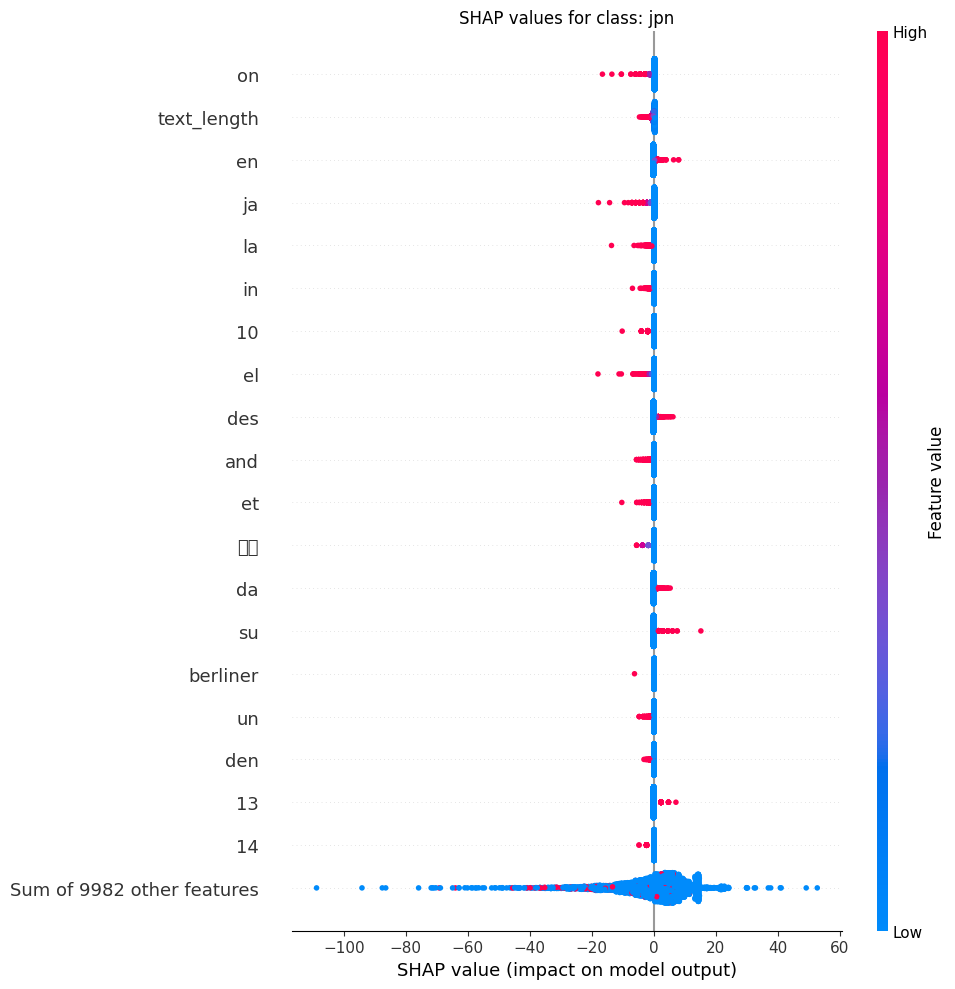

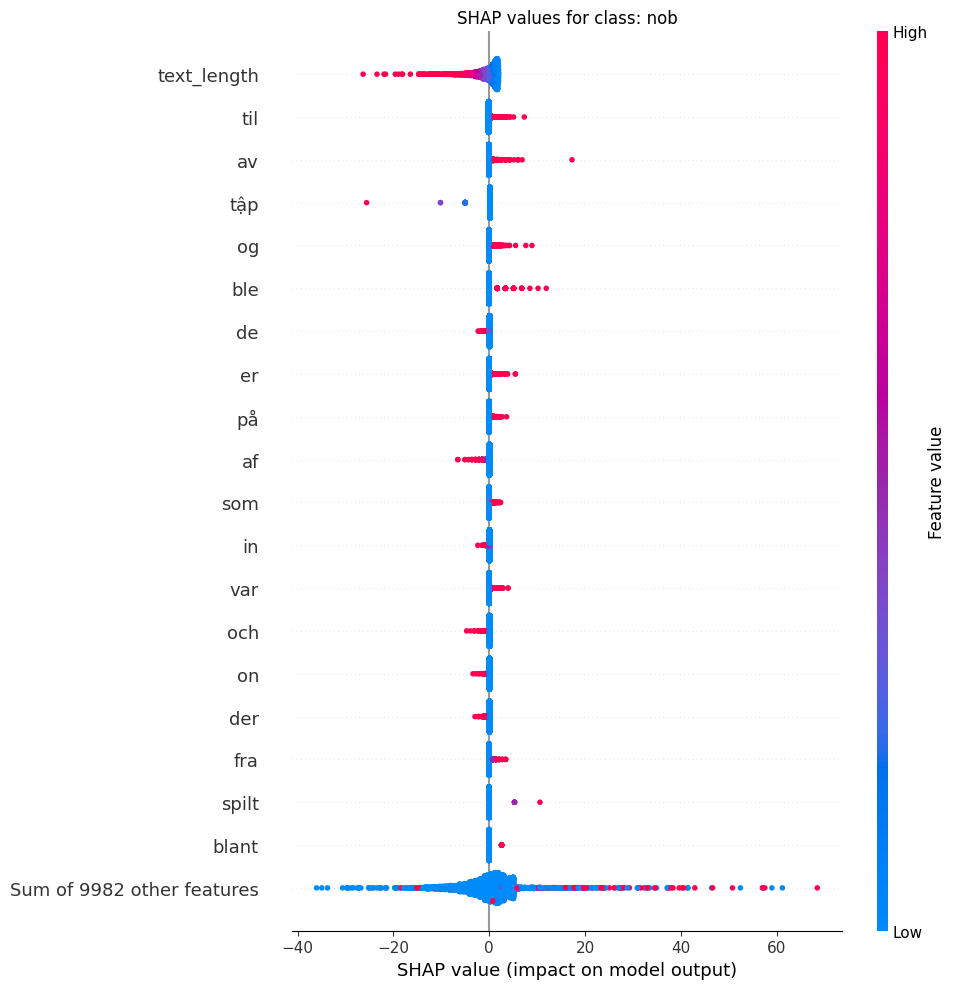

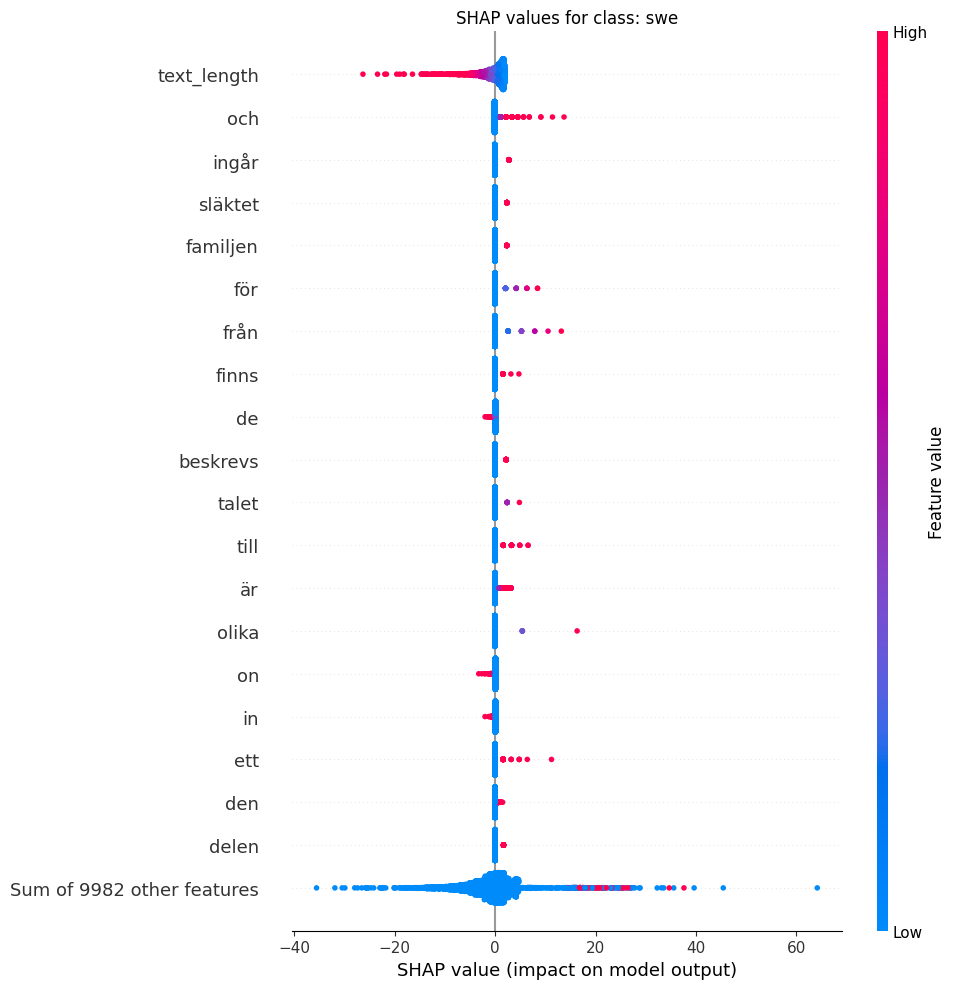

In [19]:
# Create a SHAP Explainer object
explainer = shap.Explainer(best_pipeline.named_steps['classifier'], x_train_transformed, feature_names = feature_names)

# Compute SHAP values
shap_values = explainer(x_test_transformed)

# Extract the classes' real name
categories = label_encoder.classes_
print(categories)
print(shap_values.shape)

# Create a single figure with beeswarm plots for all categories
for i, category in enumerate(categories):
    if category in target_languages:
        # Beeswarm plot
      figsize = (10, 10)
      plt.figure(figsize=figsize)
      shap.plots.beeswarm(shap_values[:, :, i], max_display=20, show=False, plot_size=figsize)
      plt.title(f"SHAP values for class: {category}")
      plt.tight_layout()
      plt.show()

---

### 6.1 Ablation Study

Lastly, we want to conduct a small ablation study to investigate how well our model performs under different conditions.

As a first step, choose the two languages for which the classifier worked best.

Next, re-fit the best model six times, each time reducing the **length** of each instance in the training set. To do this, create a custom `TextReducer` class that you can include as a preprocessing step in your pipeline. The class should take a `max_len` argument as a hyperparameter that can be set to train the following models:

- Model 1: `max_len = None` (i.e. no truncation!)
- Model 2: `max_len = 500`
- Model 3: `max_len = 250`
- Model 4: `max_len = 150`
- Model 5: `max_len = 100`
- Model 6: `max_len = 50`

Use average accuracy over the cross validation scores for each model to measure performance for each ablation setting.

📝❓ How does the reduction of training data affect the performance of the classifier? And what could be some possible reasons for this?

In [20]:
# TODO: Ablation study
class TextReducer(BaseEstimator, TransformerMixin):
    def __init__(self, max_len=None):
        self.max_len = max_len

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.max_len is None:
            return X
        return [text[:self.max_len] for text in X]

def create_pipeline(max_len):
    return Pipeline([
        ('text_reducer', TextReducer(max_len=max_len)),
        ('features', FeatureUnion([
            ('vectorizer', CountVectorizer(max_features=10000)),
            ('text_length', TextLengthExtractor())
        ])),
        ('scaler', StandardScaler(with_mean=False)),
        ('classifier', LogisticRegression(penalty='l2', solver='liblinear'))
    ])

# List of max_len values
max_len_values = [None, 500, 250, 150, 100, 50]

# Dictionary to store results
results = {}

for max_len in max_len_values:
    print(f"Evaluating model with max_len={max_len}...")

    pipeline = create_pipeline(max_len=max_len)

    scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='accuracy')

    results[max_len] = scores.mean()

# Print the results
for max_len, score in results.items():
    print(f"Max Length: {max_len}, Average Accuracy: {score:.4f}")

Evaluating model with max_len=None...
Evaluating model with max_len=500...
Evaluating model with max_len=250...
Evaluating model with max_len=150...
Evaluating model with max_len=100...
Evaluating model with max_len=50...
Max Length: None, Average Accuracy: 0.9399
Max Length: 500, Average Accuracy: 0.9419
Max Length: 250, Average Accuracy: 0.9399
Max Length: 150, Average Accuracy: 0.9278
Max Length: 100, Average Accuracy: 0.9029
Max Length: 50, Average Accuracy: 0.8281


---

📝❓ Write your lab report here addressing all questions in the notebook

# 1.1 Exploring the Training Data

### Data Size Concerns:
Upon inspecting the training data, I found that each language is represented by only 500 instances. While this provides a balanced dataset, I have concerns about whether 500 instances per language is sufficient for robust model training, especially for certain languages that may require more context to differentiate effectively.

### Balanced Dataset:
The dataset is perfectly balanced with 500 instances for each label, ensuring that no particular class dominates. This is advantageous as it prevents the model from becoming biased towards more frequent classes, which can be a common issue in imbalanced datasets.

### Train-Test Split:
Initially, the train-test split in the raw data was 50:50, which could limit the amount of data available for training. To improve the model's performance, I modified the split to 80:20, providing the model with more training data to learn from, while still retaining enough data to evaluate generalization on unseen data.

---

# 3.2 Best Model Selection

### Best Hyperparameter Combinations:
The best-performing model on the test set utilized the following hyperparameter combination:
- **max_features**: 10,000 (limiting the number of features generated by the vectorizer)
- **penalty**: l2 (for regularization in logistic regression)
- **solver**: liblinear (for efficient optimization in logistic regression)

### Advantage of Grid Search Cross-Validation:
The advantage of using grid search cross-validation is that it systematically explores different hyperparameter combinations to identify the optimal configuration for the model. Each hyperparameter has its pros and cons, and grid search allows us to test various combinations to find the one that best suits our problem. It helps automate and streamline the hyperparameter tuning process, ensuring a thorough exploration of options.

---

# 3.3 Model Evaluation

### Performance on Test Set:
When evaluating the model using standard metrics such as accuracy, precision, recall, and F1 score, the model performs well on the heldout test set. Overall, the precision and recall across most languages exceed 97%, demonstrating the effectiveness of the model for most language classifications.

---

# 4.1 Error Analysis

### Areas of Success and Failure:
The model generally performs well, achieving over 97% precision and recall for most languages. However, it struggles with Chinese and Japanese classifications:
- **Chinese**: Precision: 0.89, Recall: 0.53
- **Japanese**: Precision: 0.37, Recall: 0.70

### Possible Reasons for Failure:
The main challenge appears to be the difference between Asian and European language systems. Since the majority of the training data comes from European languages, the model may not have been able to capture the nuances of Asian languages effectively. Additionally, Japanese and Chinese share many characters (Kanji in Japanese), which likely confuses the model, making it harder to differentiate between these two languages. This overlap in script could contribute to misclassifications and lower precision for Japanese.

---

# 5.1 Interpretability Analysis

### Importance of Features:
In language classification, I believe the **outputs of the vectorizer** are more important than extra features. For instance, a sentence like "Oyi, mate" clearly indicates English, and "なにをしるよ" is easily identifiable as Japanese. The vectorizer captures these language-specific n-grams, which are crucial for classification.

On the other hand, **extra features** like text length may not play as significant a role in this task. While text length might be more relevant for tasks like spam detection (where longer emails might indicate spam), in language classification, the specific content and patterns (captured by the vectorizer) are far more important.

---

# 6.1 Ablation Study

### Impact of Training Data Reduction:
The ablation study revealed that as the text length is reduced, the performance of the classifier deteriorates. For example:
- **No truncation** (max_len=None) yields high accuracy (~93.99%).
- **Severe truncation** (max_len=50) results in a significant drop to ~82.81%.

### Possible Reasons for Performance Decline:
One possible reason for this performance degradation is the **loss of context**. Longer texts often contain important words and phrases that are crucial for accurate classification. When the text is truncated, the model loses valuable context, making it harder to make correct predictions. Additionally, with shorter text, the proportion of **noise** increases, as irrelevant or incomplete phrases might dominate the input, further harming the model's performance.

---



